In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

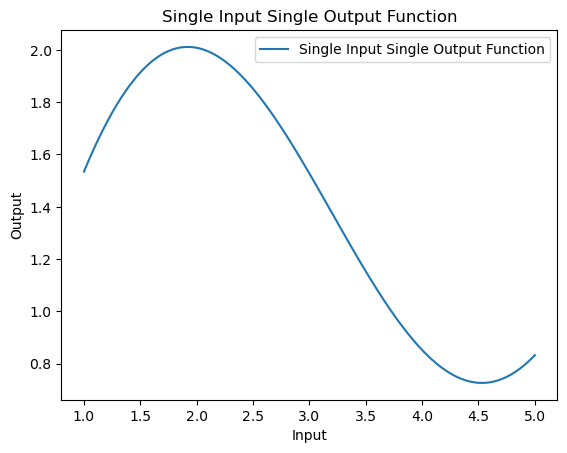

In [63]:
def target_function(x):
    return np.sin(x) + np.log(x + 1)

np.random.seed(0)
x_train = np.random.uniform(1, 5, 2000).reshape(-1, 1)
y_train = target_function(x_train).reshape(-1, 1)

x_val = np.linspace(1, 5, 400).reshape(-1, 1)
y_val = target_function(x_val).reshape(-1, 1)

plt.plot(x_val, y_val, label='Single Input Single Output Function')
plt.title('Single Input Single Output Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

In [64]:
# Convert numpy arrays to torch tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()
x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).float()

In [65]:
class DNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, no_of_layers):
        super(DNNModel, self).__init__()
        self.hidden_layers = nn.ModuleList([
            nn.Linear(input_size, hidden_size),
            nn.ReLU()
        ] + [nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU()
        ) for _ in range(no_of_layers)])
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        output = self.output_layer(x)
        return output

# Initialize models
model1 = DNNModel(1, 8, 1,7)  
model2 = DNNModel(1, 10, 1, 5)  
model3 = DNNModel(1, 14, 1, 10)  

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer1 = optim.Adam(model1.parameters())
optimizer2 = optim.Adam(model2.parameters())
optimizer3 = optim.Adam(model3.parameters())

print(sum(p.numel() for p in model1.parameters()))
print(sum(p.numel() for p in model2.parameters()))
print(sum(p.numel() for p in model3.parameters()))

529
581
2143


In [66]:
# Training loop
def train_model(model, optimizer, x_train, y_train, epochs=20000, tolerance=1e-5):
    model.train()
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item()}")

        # Check for convergence, assuming at least 2 epochs have been run
        if epoch > 5 and abs(losses[-2] - losses[-1]) < tolerance:
            print(f"Convergence reached at epoch {epoch}. Loss = {loss.item()}")
            break

    return losses


losses1 = train_model(model1, optimizer1, x_train, y_train)
losses2 = train_model(model2, optimizer2, x_train, y_train)
losses3 = train_model(model3, optimizer3, x_train, y_train)

Epoch 0: Loss = 2.6583826541900635
Epoch 100: Loss = 0.8248154520988464
Epoch 200: Loss = 0.39722588658332825
Epoch 300: Loss = 0.11741619557142258
Epoch 400: Loss = 0.01564333215355873
Epoch 500: Loss = 0.009237045422196388
Epoch 600: Loss = 0.006715201307088137
Convergence reached at epoch 638. Loss = 0.006276227533817291
Epoch 0: Loss = 2.9146056175231934
Epoch 100: Loss = 1.4423669576644897
Epoch 200: Loss = 0.4295803904533386
Epoch 300: Loss = 0.13344454765319824
Epoch 400: Loss = 0.03914475813508034
Epoch 500: Loss = 0.030198249965906143
Epoch 600: Loss = 0.012829553335905075
Epoch 700: Loss = 0.0025587924756109715
Convergence reached at epoch 762. Loss = 0.0014145852765068412
Epoch 0: Loss = 2.4233832359313965
Epoch 100: Loss = 0.25925543904304504
Epoch 200: Loss = 0.07603258639574051
Epoch 300: Loss = 0.0075209117494523525
Convergence reached at epoch 342. Loss = 0.006937829777598381


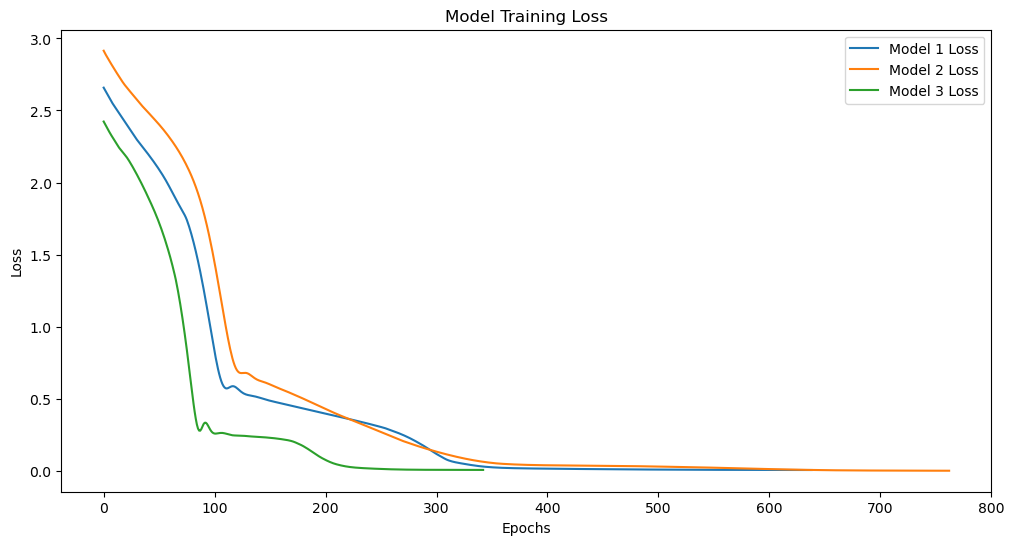

In [67]:
# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(losses1, label='Model 1 Loss')
plt.plot(losses2, label='Model 2 Loss')
plt.plot(losses3, label='Model 3 Loss')
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

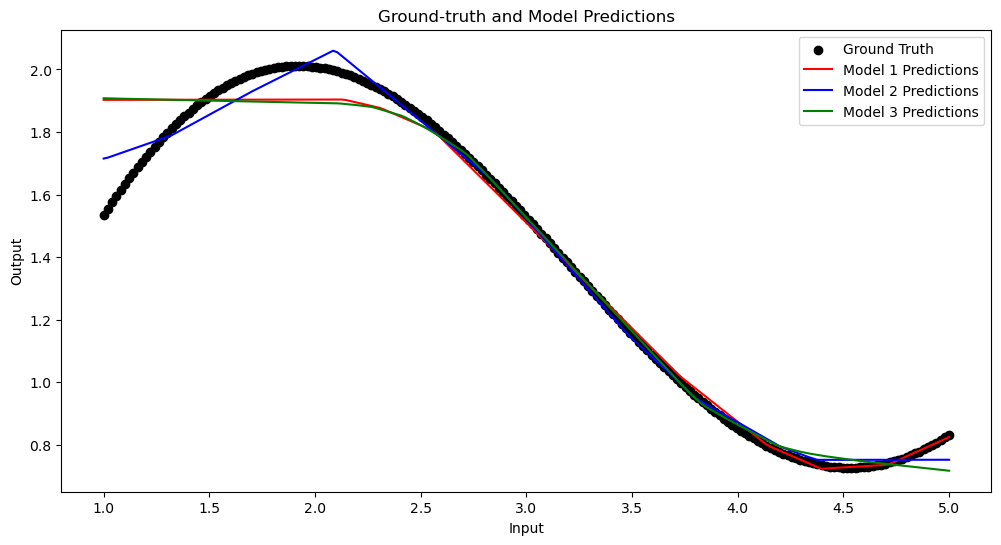

In [68]:
# Visualize predictions
model1.eval() 
model2.eval()
model3.eval()

with torch.no_grad(): 
    x_test = torch.linspace(1, 5, 200).view(-1, 1).float()
    y_test = target_function(x_test.numpy())
    y_pred1 = model1(x_test).numpy()
    y_pred2 = model2(x_test).numpy()
    y_pred3 = model3(x_test).numpy()

plt.figure(figsize=(12, 6))
plt.scatter(x_test.numpy(), y_test, color='black', label='Ground Truth')
plt.plot(x_test.numpy(), y_pred1, label='Model 1 Predictions', color='red')
plt.plot(x_test.numpy(), y_pred2, label='Model 2 Predictions', color='blue')
plt.plot(x_test.numpy(), y_pred3, label='Model 3 Predictions', color='green')
plt.title('Ground-truth and Model Predictions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()


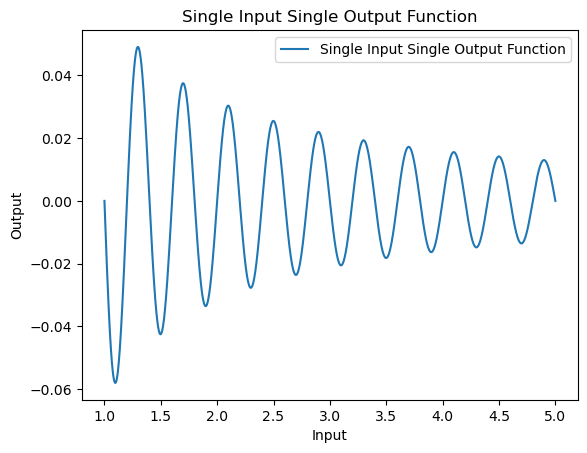

In [52]:
def target_function(x):
    return np.sinc(5*x)

np.random.seed(0)
x_train = np.random.uniform(1, 5, 10000).reshape(-1, 1)
y_train = target_function(x_train).reshape(-1, 1)

x_val = np.linspace(1, 5, 2000).reshape(-1, 1)
y_val = target_function(x_val).reshape(-1, 1)

plt.plot(x_val, y_val, label='Single Input Single Output Function')
plt.title('Single Input Single Output Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

In [53]:
# Convert numpy arrays to torch tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()
x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).float()

In [54]:
class DNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, no_of_layers, dropout_rate=0.5):
        super(DNNModel, self).__init__()
        layers = [nn.Linear(input_size, hidden_size), nn.ReLU(), nn.BatchNorm1d(hidden_size), nn.Dropout(dropout_rate)]
        
        for _ in range(1, no_of_layers):
            layers += [nn.Linear(hidden_size, hidden_size),
                       nn.ReLU(),
                       nn.BatchNorm1d(hidden_size),
                       nn.Dropout(dropout_rate)]
            
        self.layers = nn.Sequential(*layers)
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layers(x)
        output = self.output_layer(x)
        return output

# Initialize models
model1 = DNNModel(1, 50, 1, 3, 0.1)  # Slightly less complex
model2 = DNNModel(1, 100, 1, 4, 0.2) # More complex
model3 = DNNModel(1, 150, 1, 5, 0.3) # Most complex 

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer1 = optim.Adam(model1.parameters())
optimizer2 = optim.Adam(model2.parameters())
optimizer3 = optim.Adam(model3.parameters())

print(sum(p.numel() for p in model1.parameters()))
print(sum(p.numel() for p in model2.parameters()))
print(sum(p.numel() for p in model3.parameters()))

5551
31401
92551


In [55]:
# Training loop
def train_model(model, optimizer, x_train, y_train, epochs=20000, tolerance=1e-5):
    model.train()
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item()}")

        # Check for convergence, assuming at least 2 epochs have been run
        if epoch > 5 and abs(losses[-2] - losses[-1]) < tolerance:
            print(f"Convergence reached at epoch {epoch}. Loss = {loss.item()}")
            break

    return losses


losses1 = train_model(model1, optimizer1, x_train, y_train)
losses2 = train_model(model2, optimizer2, x_train, y_train)
losses3 = train_model(model3, optimizer3, x_train, y_train)

Epoch 0: Loss = 0.47440850734710693
Epoch 100: Loss = 0.01999077759683132
Convergence reached at epoch 193. Loss = 0.009708940051496029
Epoch 0: Loss = 0.2969106137752533
Epoch 100: Loss = 0.008404895663261414
Convergence reached at epoch 143. Loss = 0.002855028258636594
Epoch 0: Loss = 0.44649702310562134
Convergence reached at epoch 65. Loss = 0.01662350259721279


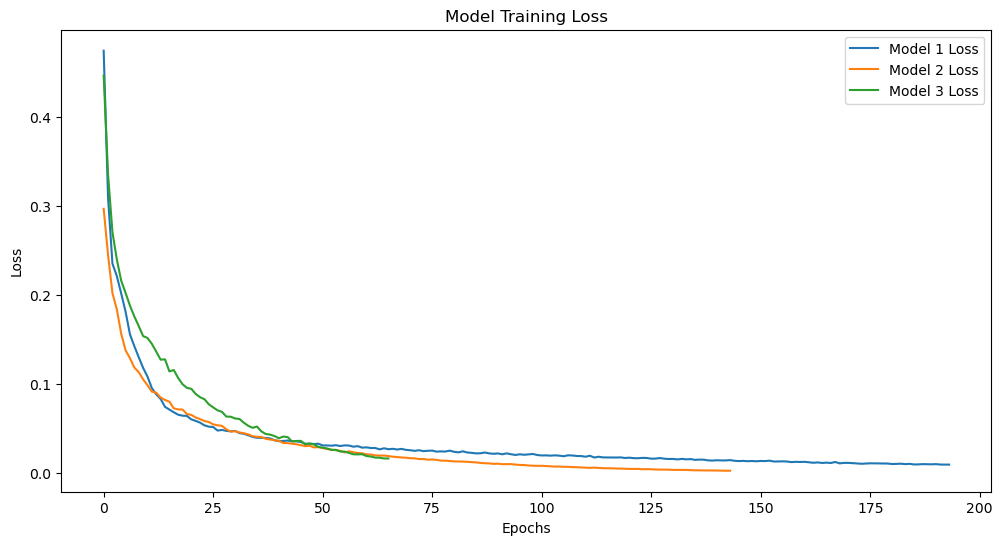

In [56]:
# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(losses1, label='Model 1 Loss')
plt.plot(losses2, label='Model 2 Loss')
plt.plot(losses3, label='Model 3 Loss')
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

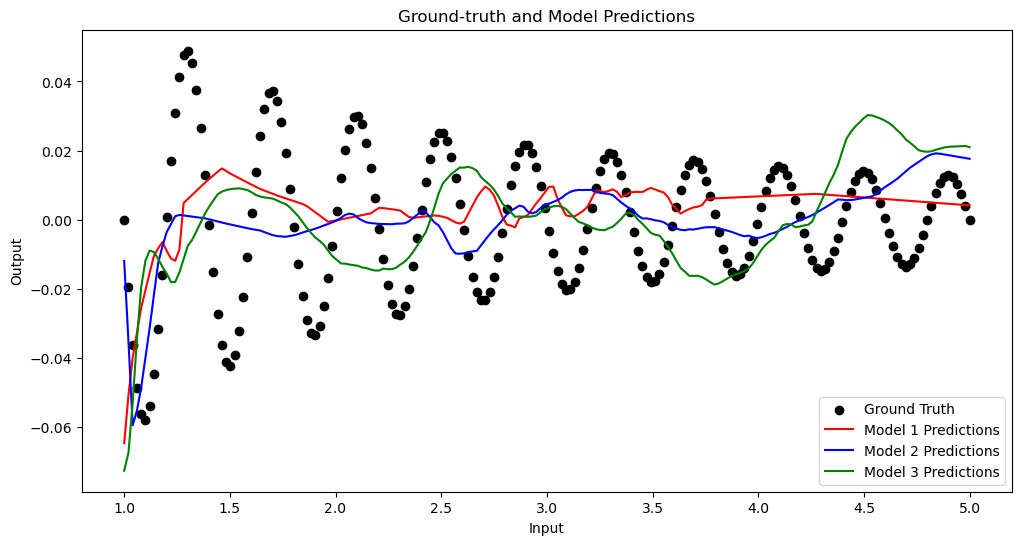

In [57]:
# Visualize predictions
model1.eval()  # Set model to evaluation mode
model2.eval()
model3.eval()

with torch.no_grad():  # No need to track gradients
    x_test = torch.linspace(1, 5, 200).view(-1, 1).float()
    y_test = target_function(x_test.numpy())
    y_pred1 = model1(x_test).numpy()
    y_pred2 = model2(x_test).numpy()
    y_pred3 = model3(x_test).numpy()

plt.figure(figsize=(12, 6))
plt.scatter(x_test.numpy(), y_test, color='black', label='Ground Truth')
plt.plot(x_test.numpy(), y_pred1, label='Model 1 Predictions', color='red')
plt.plot(x_test.numpy(), y_pred2, label='Model 2 Predictions', color='blue')
plt.plot(x_test.numpy(), y_pred3, label='Model 3 Predictions', color='green')
plt.title('Ground-truth and Model Predictions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()
